<a href="https://colab.research.google.com/github/Sashank11/learn_tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

In [34]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit

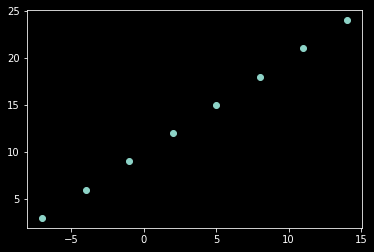

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels 
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
with plt.style.context('dark_background'):
  plt.scatter(X,y);

In [36]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [37]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [38]:
X.shape, y.shape

((8,), (8,))

In [39]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [40]:
X[0].ndim

0

In [41]:
X[0], y[0] # In this case we use only 1 X value to predict 1 y value

(-7.0, 3.0)

In [42]:
# Turn our NumPy arrays into tensors
X = tf.constant(X);
y = tf.constant(y);
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [43]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

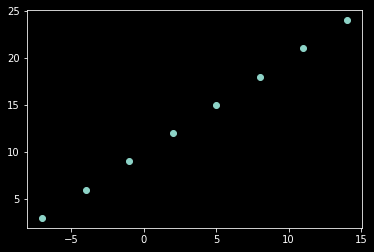

In [44]:
with plt.style.context("dark_background"):
  plt.scatter(X,y);

# Steps in modelling with TensorFlow

## 1.  Creating a model - define input, hidden, output layers of a DL model
## 2.  Compiling a model - define loss function(error rate/amount), optimizer and evaluation metrics
## 3.  Fitting a model - letting the model try to find patterns b/w X and y

In [47]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 1), # SGD: Stochasitc gradient descent
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X,axis = -1), y, epochs=100);

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 393ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 7.0048 - mae: 7.0048
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 9.4578 - mae: 9.4578
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1106 - mae: 10.1106
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2394 - mae: 8.2394
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 5.5039 - mae: 5.5039
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 4.3896 - mae: 4.3896
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 4.9851 - mae: 4.9851
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 4.8325 - mae: 4.8325
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 4.0845 - mae: 4.0845
Epoch 11/100
1/1 [==============================] - 0s 19ms/step - loss: 2.8

In [48]:
# Try and make prediction
model.predict([17.0])

array([[24.42508]], dtype=float32)

## Improving our Model
### We can improve model by altering the steps we took to Create
### 1. Creating a model - Here we add more layers, increase hidden units, change activation function of each layer
### 2. Compiling a model - Here we change Optimization function or learning rate
### 3. Fitting a model - increase epochs or increase data

In [56]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation ="relu"),
  tf.keras.layers.Dense(100, activation ="relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr = 0.1),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 975ms/step - loss: 13.3030 - mae: 13.3030
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 99.7780 - mae: 99.7780
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 9.2314 - mae: 9.2314
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 12.9976 - mae: 12.9976
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 11.4197 - mae: 11.4197
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 5.2410 - mae: 5.2410
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 18.7342 - mae: 18.7342
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 7.2566 - mae: 7.2566
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 9.0452 - mae: 9.0452
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 9.8199 - mae: 9.8199
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss

In [57]:
model.predict([17.0])

array([[26.582006]], dtype=float32)